In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dftrain = pd.read_csv('sign_mnist_train.csv')

In [3]:
dftrain.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train = np.array(dftrain)

In [5]:
train

array([[  3, 107, 118, ..., 204, 203, 202],
       [  6, 155, 157, ..., 103, 135, 149],
       [  2, 187, 188, ..., 195, 194, 195],
       ...,
       [ 18, 174, 174, ..., 202, 200, 200],
       [ 17, 177, 181, ...,  64,  87,  93],
       [ 23, 179, 180, ..., 205, 209, 215]])

In [6]:
train = train[:,1:]

In [7]:
train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [8]:
train = train/255

In [9]:
train

array([[0.41960784, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607843,
        0.79215686],
       [0.60784314, 0.61568627, 0.61176471, ..., 0.40392157, 0.52941176,
        0.58431373],
       [0.73333333, 0.7372549 , 0.7372549 , ..., 0.76470588, 0.76078431,
        0.76470588],
       ...,
       [0.68235294, 0.68235294, 0.68235294, ..., 0.79215686, 0.78431373,
        0.78431373],
       [0.69411765, 0.70980392, 0.72156863, ..., 0.25098039, 0.34117647,
        0.36470588],
       [0.70196078, 0.70588235, 0.70588235, ..., 0.80392157, 0.81960784,
        0.84313725]])

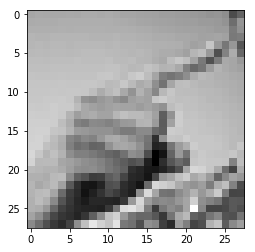

In [10]:
plt.imshow(np.reshape(train[1,:],(28,28)),'gray')

In [11]:
X = train
Y = np.array(dftrain['label'])

In [12]:
Y

array([ 3,  6,  2, ..., 18, 17, 23])

In [13]:
Y.min()

0

In [14]:
Y.max()

24

In [15]:
model = keras.models.Sequential()

In [16]:
#model.add(keras.layers.Flatten(input_shape=[1,1]))

In [17]:
model.add(keras.layers.Dense(300, activation="relu"))

In [18]:
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(25, activation="softmax"))

In [19]:
model.layers

In [20]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [23]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test))

W0812 23:10:12.791174 140145432495936 deprecation.py:323] From /home/gp/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 19218 samples, validate on 8237 samples
Epoch 1/30
19218/19218 [==============================] - 2s 86us/sample - loss: 2.7641 - accuracy: 0.2209 - val_loss: 2.3124 - val_accuracy: 0.3551
Epoch 2/30
19218/19218 [==============================] - 1s 75us/sample - loss: 1.9845 - accuracy: 0.4271 - val_loss: 1.7089 - val_accuracy: 0.5106
Epoch 3/30
19218/19218 [==============================] - 1s 76us/sample - loss: 1.5429 - accuracy: 0.5495 - val_loss: 1.3695 - val_accuracy: 0.5730
Epoch 4/30
19218/19218 [==============================] - 1s 71us/sample - loss: 1.2735 - accuracy: 0.6152 - val_loss: 1.2658 - val_accuracy: 0.5848
Epoch 5/30
19218/19218 [==============================] - 2s 81us/sample - loss: 1.0872 - accuracy: 0.6720 - val_loss: 1.0402 - val_accuracy: 0.6535
Epoch 6/30
19218/19218 [==============================] - 1s 73us/sample - loss: 0.9453 - accuracy: 0.7119 - val_loss: 1.0378 - val_accuracy: 0.6647
Epoch 7/30
19218/19218 [==============================] -

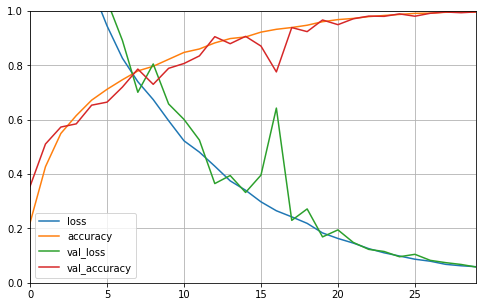

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [25]:
dftest = pd.read_csv('sign_mnist_test.csv')

In [26]:
dftest.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [27]:
Xtest = np.array(dftest)
Xtest = Xtest[:,1:]
Xtest = Xtest/255
Ytest = np.array(dftest['label'])

In [41]:
model.evaluate(Xtest,Ytest)

7172/7172 [==============================] - 0s 35us/sample - loss: 0.9613 - accuracy: 0.7450


[0.9612784467957503, 0.74498045]

In [42]:
X_new = Xtest[0:1,:]

In [48]:
y_prob = model.predict_classes(Xtest)

In [49]:
y_prob

array([ 6,  5, 10, ...,  2,  4,  2])

In [50]:
Ytest

array([ 6,  5, 10, ...,  2,  4,  2])

In [51]:
l = list()
for i in range(65,90):
    l.append(chr(i))

TypeError: only integer scalar arrays can be converted to a scalar index

I


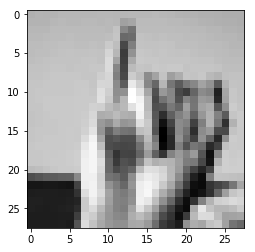

In [53]:
X_new = Xtest[100:101,:]
y_pred = model.predict_classes(X_new)
plt.imshow(np.reshape(X_new,(28,28)),'gray')
print(l[int(y_pred[0:1])])